In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path

def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    mpl.rcParams['lines.linewidth'] = 2
    return None
setup_mpl()

data_dict = {}

for d in Path('../data/raw/dataset').glob('D1_*'):
    d_name = d.name
    data_dict[d_name] = {}

    for id_ in d.glob('ID_*'):
        id_name = id_.name
        data_dict[d_name][id_name] = {}

        for round_ in id_.glob('round_*'):
            round_name = round_.name
            data_dict[d_name][id_name][round_name] = {}

            for phase in round_.glob('phase*'):
                phase_name = phase.name
                data_dict[d_name][id_name][round_name][phase_name] = {}

                for file in phase.glob('*.csv'):
                    if file.name not in ('response.csv',):
                        temp_df = pd.read_csv(file, index_col=None)
                        temp_df['time'] = pd.to_datetime(temp_df['time'], format='%Y-%m-%d %H:%M:%S.%f')
                        temp_df['time_passed'] = (temp_df['time'] - temp_df['time'].iloc[0]).apply(lambda x: x.total_seconds())

                        # Save dataframe in nested dictionary
                        data_dict[d_name][id_name][round_name][phase_name][file.stem] = temp_df

In [3]:
def normalize_std(X):
    '''
    Function for normalizing the columns (variables) of a data matrix to unit length.
    Returns the normalized data and the L2 norm of the variables

    Input  (X) --------> The data matrix to be normalized
    Output (X_pre)-----> The normalized data matrix
    Output (d) --------> Array with the L2 norms of the variables
    '''
    std = np.std(X,axis=0)  # d is the euclidian lenghts of the variables

    X_pre = X / std                       # Normalize the data with the euclidian lengths
    return X_pre,d                      # Return normalized data and the euclidian lengths


In [4]:
min_len_eda = min(len(data_dict[cohort][id][round_][phase]['EDA']['EDA'].tolist()) for cohort in data_dict for id in data_dict[cohort] for round_ in data_dict[cohort][id] for phase in data_dict[cohort][id][round_])

merged_cohorts = {
    'D1_1': ['D1_1'],
    'D1_2': ['D1_2'],
    'D1_3': ['D1_3_1', 'D1_3_2', 'D1_3_3', 'D1_3_4']
}

X = []

labels = []


for cohort in data_dict.keys():
    for id in data_dict[cohort].keys():
        for round_ in data_dict[cohort][id].keys():
            for phase in data_dict[cohort][id][round_].keys():

                eda_ts = data_dict[cohort][id][round_][phase]['EDA'].EDA
        # Series differ in length, not sure how we should solve this problem... for now I'll introduce zero-padding...


                if len(eda_ts) > min_len_eda:
                      eda_ts = eda_ts[:min_len_eda]

                labels.append(phase)
                X += [eda_ts]

labels = np.array(labels)
X = np.vstack(X)
X_pre = X - np.mean(X,axis=0)
X_pre,_ = normalize_std(X_pre)
#Vi siger at hvert tidsstep er en feature.
#X_pre

In [5]:

#224 er antal timesteps i en enkelt phase

#Det er hver gang en person bliver målt med et armbånd.
#Vi får 312 som det samlede antal observationer vi har, nemlig Participants*Cohort*Rounds
min_len_eda

894

In [6]:
from sklearn import decomposition
n_components = 2

model = decomposition.PCA(n_components=n_components)
X_transformed = model.fit_transform(X_pre)

#X_hat = np.dot(X_transformed, model.mixing_.T) + model.mean_
#L = 0.5*np.linalg.norm(X-X_hat)**2

phase1_idx = np.where(labels=='phase1')[0]
phase2_idx = np.where(labels=='phase2')[0]
phase3_idx = np.where(labels=='phase3')[0]
X_transformed.shape
#phase1_idx

(312, 2)

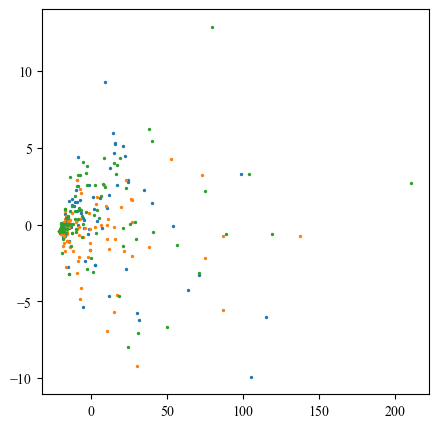

In [7]:
#EDA
#Vi laver en dimensionalitetsreduktion af signalet ned til 2 dimensioner. Vi regner med at signalet kan beskrives som 2 dimensioner.

fig, ax = plt.subplots(figsize=(5,5), dpi=100)

ax.scatter(X_transformed[phase1_idx, 0], X_transformed[phase1_idx, 1], s=2)
ax.scatter(X_transformed[phase2_idx, 0], X_transformed[phase2_idx, 1], s=2)
ax.scatter(X_transformed[phase3_idx, 0], X_transformed[phase3_idx, 1], s=2)

#plt.scatter(X_transformed[:,0], , c = 'red')

In [18]:
min_len_hr = min(len(data_dict[cohort][id][round_][phase]['HR']['HR'].tolist()) for cohort in data_dict for id in data_dict[cohort] for round_ in data_dict[cohort][id] for phase in data_dict[cohort][id][round_])

merged_cohorts = {
    'D1_1': ['D1_1'],
    'D1_2': ['D1_2'],
    'D1_3': ['D1_3_1', 'D1_3_2', 'D1_3_3', 'D1_3_4']
}

X = []

labels = []


for cohort in data_dict.keys():
    for id in data_dict[cohort].keys():
        for round_ in data_dict[cohort][id].keys():
            for phase in data_dict[cohort][id][round_].keys():

                hr_ts = data_dict[cohort][id][round_][phase]['HR'].HR
        # Series differ in length, not sure how we should solve this problem... for now I'll introduce zero-padding...


                if len(hr_ts) > min_len_hr:
                      hr_ts = hr_ts[:min_len_hr]

                labels.append(phase)
                X += [hr_ts]

labels = np.array(labels)
X = np.vstack(X)
X_pre = X - np.mean(X,axis=0)
X_pre,_ = normalize_std(X_pre)
#Vi siger at hvert tidsstep er en feature.
X_pre.shape

(312, 224)

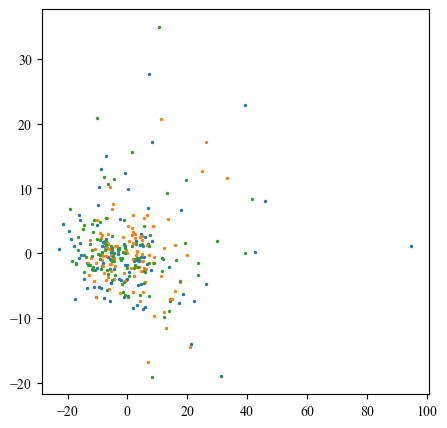

In [19]:
#HR
from sklearn import decomposition
n_components = 2

model = decomposition.PCA(n_components=n_components)
X_transformed = model.fit_transform(X_pre)
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

ax.scatter(X_transformed[phase1_idx, 0], X_transformed[phase1_idx, 1], s=2)
ax.scatter(X_transformed[phase2_idx, 0], X_transformed[phase2_idx, 1], s=2)
ax.scatter(X_transformed[phase3_idx, 0], X_transformed[phase3_idx, 1], s=2)

In [20]:
min_len_temp = min(len(data_dict[cohort][id][round_][phase]['TEMP']['TEMP'].tolist()) for cohort in data_dict for id in data_dict[cohort] for round_ in data_dict[cohort][id] for phase in data_dict[cohort][id][round_])

merged_cohorts = {
    'D1_1': ['D1_1'],
    'D1_2': ['D1_2'],
    'D1_3': ['D1_3_1', 'D1_3_2', 'D1_3_3', 'D1_3_4']
}

X = []

labels = []


for cohort in data_dict.keys():
    for id in data_dict[cohort].keys():
        for round_ in data_dict[cohort][id].keys():
            for phase in data_dict[cohort][id][round_].keys():

                temp_ts = data_dict[cohort][id][round_][phase]['TEMP'].TEMP
        # Series differ in length, not sure how we should solve this problem... for now I'll introduce zero-padding...


                if len(temp_ts) > min_len_temp:
                      temp_ts = temp_ts[:min_len_temp]

                labels.append(phase)
                X += [temp_ts]

labels = np.array(labels)
X = np.vstack(X)
X_pre = X - np.mean(X,axis=0)
X_pre,_ = normalize_std(X_pre)
#Vi siger at hvert tidsstep er en feature.
X_pre.shape

(312, 894)

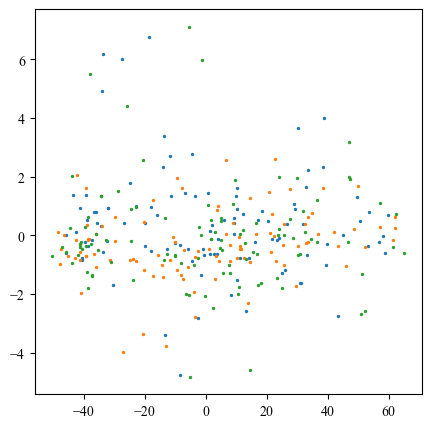

In [21]:
#HR
from sklearn import decomposition
n_components = 2

model = decomposition.PCA(n_components=n_components)
X_transformed = model.fit_transform(X_pre)
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

ax.scatter(X_transformed[phase1_idx, 0], X_transformed[phase1_idx, 1], s=2)
ax.scatter(X_transformed[phase2_idx, 0], X_transformed[phase2_idx, 1], s=2)
ax.scatter(X_transformed[phase3_idx, 0], X_transformed[phase3_idx, 1], s=2)

In [22]:
min_len_bvp = min(len(data_dict[cohort][id][round_][phase]['BVP']['BVP'].tolist()) for cohort in data_dict for id in data_dict[cohort] for round_ in data_dict[cohort][id] for phase in data_dict[cohort][id][round_])

merged_cohorts = {
    'D1_1': ['D1_1'],
    'D1_2': ['D1_2'],
    'D1_3': ['D1_3_1', 'D1_3_2', 'D1_3_3', 'D1_3_4']
}

X = []

labels = []


for cohort in data_dict.keys():
    for id in data_dict[cohort].keys():
        for round_ in data_dict[cohort][id].keys():
            for phase in data_dict[cohort][id][round_].keys():

                bvp_ts = data_dict[cohort][id][round_][phase]['BVP'].BVP
        # Series differ in length, not sure how we should solve this problem... for now I'll introduce zero-padding...


                if len(bvp_ts) > min_len_bvp:
                      bvp_ts = bvp_ts[:min_len_bvp]

                labels.append(phase)
                X += [bvp_ts]

labels = np.array(labels)
X = np.vstack(X)
X_pre = X - np.mean(X,axis=0)
X_pre,_ = normalize_std(X_pre)
#Vi siger at hvert tidsstep er en feature.
X_pre.shape

(312, 14301)

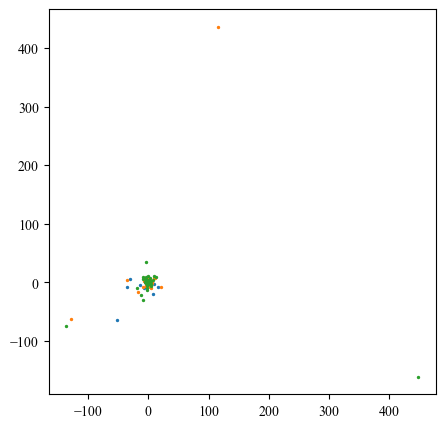

In [23]:
#HR
from sklearn import decomposition
n_components = 2

model = decomposition.PCA(n_components=n_components)
X_transformed = model.fit_transform(X_pre)
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

ax.scatter(X_transformed[phase1_idx, 0], X_transformed[phase1_idx, 1], s=2)
ax.scatter(X_transformed[phase2_idx, 0], X_transformed[phase2_idx, 1], s=2)
ax.scatter(X_transformed[phase3_idx, 0], X_transformed[phase3_idx, 1], s=2)